Analysis
-"For” Brexit  precincts had higher unemployment rates during the global recession and years leading up to Brexit compared to ‘Against’ Brexit precincts.
-Job Density is consistently higher in Precincts that voted “Against” Brexit. 
-“For” Brexit precincts consistently have a job density less than 1, which indicates more people (ages 16-64) than available jobs.
-"Against" Brexit precincts have a consistently higher gross weekly pay than "For" Brexit precincts
-"For" Brexit precincts had reduced gross weekly pay during the global recession while "Against" Brexit precincts still had increasing gross weekly earnings during the recession.

In [348]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
import pylab as p

In [349]:
#import csv
jobsdensity_df = pd.read_csv(r"jobsdensity.csv")
unemployment_df = pd.read_csv(r"unemployment.csv")
weeklypaybyarea_df = pd.read_csv(r"weeklypaybyarea.csv")

In [350]:
jobsdensity_df.head()

,Job Density by Area,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,North East Lincolnshire,0.79,0.76,0.74,0.75,0.76,0.74,0.74,0.73,0.70,0.71,0.74,0.78,0.79,0.79
1,Boston,0.77,0.84,0.80,0.85,0.77,0.75,0.82,0.84,0.86,0.88,0.83,0.80,0.87,0.94
2,Cambridge,1.07,1.04,1.12,1.14,1.17,1.15,1.07,1.08,1.12,1.22,1.27,1.28,1.29,1.34
3,Castle Point,0.43,0.45,0.45,0.51,0.45,0.47,0.48,0.48,0.54,0.46,0.48,0.52,0.52,0.50
4,Lambeth,0.72,0.69,0.67,0.66,0.66,0.69,0.68,0.66,0.66,0.72,0.76,0.77,0.72,0.78


In [351]:
unemployment_df

,Unemployment Rate by Area,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,North East Lincolnshire,6.0,6.3,6.6,7.5,10.5,10.9,12.3,11.5,10.8,8.8,7.7,6.3,5.6,5.7
1,Boston,4.4,5.2,5.0,5.0,7.0,7.3,8.4,6.4,5.8,5.4,4.5,4.3,4.7,3.8
2,Cambridge,4.8,5.4,5.3,5.0,4.8,5.2,5.4,4.7,5.2,4.1,3.3,3.5,3.5,3.8
3,Castle Point,3.4,4.0,3.6,4.3,6.9,6.8,7.0,7.3,6.1,5.5,3.8,3.9,3.5,3.1
4,Lambeth,8.6,9.1,9.9,8.8,10.4,9.3,10.4,10.0,8.7,6.6,6.1,6.1,4.8,6.3
5,Havering,4.8,4.8,3.9,5.0,7.9,8.5,8.2,9.4,8.9,6.3,6.0,4.4,4.8,4.7
6,Oxford,4.8,5.9,6.5,5.3,5.7,6.6,5.7,5.9,5.8,4.6,3.7,4.2,2.9,3.5
7,City of Edinburgh,5.1,5.2,4.3,4.5,6.3,6.5,7.0,6.6,7.1,5.6,5.5,4.2,3.2,4.0


In [352]:
weeklypaybyarea_df

,Gross Weekly Pay by Area ( Median),2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,North East Lincolnshire,368.3,383.3,391.8,390.6,431.1,451.7,429.3,482.6,460.1,466.4,468.6,450.4,469.9,447.9,497.0
1,Boston,338.9,357.0,376.6,397.5,373.2,369.5,396.0,365.3,399.2,411.1,430.7,411.0,411.2,410.2,421.6
2,Cambridge,462.6,475.8,486.0,493.1,524.6,547.9,556.4,574.4,617.7,572.3,575.6,583.3,589.1,595.6,642.4
3,Castle Point,465.5,486.2,499.4,488.1,539.1,529.1,465.2,519.2,512.1,537.2,568.1,550.0,555.7,632.4,607.6
4,Lambeth,491.4,509.6,508.0,538.7,553.0,598.3,647.0,632.4,625.8,629.6,628.3,616.5,616.2,666.1,689.9
5,Havering,518.2,541.6,525.0,549.5,606.6,576.7,593.8,582.3,584.3,594.1,615.4,624.7,622.9,631.0,642.0
6,Oxford,435.7,451.8,466.3,483.6,498.2,495.6,514.9,526.5,517.9,533.1,571.8,556.8,589.1,631.6,623.8
7,City of Edinburgh,428.2,460.2,479.7,498.8,507.2,514.3,523.6,525.4,537.7,562.0,562.6,555.3,559.7,583.8,575.9


In [353]:
#separate precincts that voted strongly "For" Brexit
strongleave_df=weeklypaybyarea_df.loc[[0,1,3,5], :]
strongleave_df

,Gross Weekly Pay by Area ( Median),2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,North East Lincolnshire,368.3,383.3,391.8,390.6,431.1,451.7,429.3,482.6,460.1,466.4,468.6,450.4,469.9,447.9,497.0
1,Boston,338.9,357.0,376.6,397.5,373.2,369.5,396.0,365.3,399.2,411.1,430.7,411.0,411.2,410.2,421.6
3,Castle Point,465.5,486.2,499.4,488.1,539.1,529.1,465.2,519.2,512.1,537.2,568.1,550.0,555.7,632.4,607.6
5,Havering,518.2,541.6,525.0,549.5,606.6,576.7,593.8,582.3,584.3,594.1,615.4,624.7,622.9,631.0,642.0


In [354]:
#calculate averages for precincts that voted strongly "For" Brexit
strongleaveaverage_df=strongleave_df.mean()
strongleaveaverage_df=strongleaveaverage_df.to_frame().reset_index()
strongleaveaverage_df

,index,0
0,2004,422.73
1,2005,442.02
2,2006,448.20
3,2007,456.43
4,2008,487.50
5,2009,481.75
6,2010,471.07
7,2011,487.35
8,2012,488.93
9,2013,502.20


In [355]:
#separate precincts that voted strongly "Against" Brexit
strongstay_df=weeklypaybyarea_df.loc[[2,4,6,7], :]
strongstay_df

,Gross Weekly Pay by Area ( Median),2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,Cambridge,462.6,475.8,486.0,493.1,524.6,547.9,556.4,574.4,617.7,572.3,575.6,583.3,589.1,595.6,642.4
4,Lambeth,491.4,509.6,508.0,538.7,553.0,598.3,647.0,632.4,625.8,629.6,628.3,616.5,616.2,666.1,689.9
6,Oxford,435.7,451.8,466.3,483.6,498.2,495.6,514.9,526.5,517.9,533.1,571.8,556.8,589.1,631.6,623.8
7,City of Edinburgh,428.2,460.2,479.7,498.8,507.2,514.3,523.6,525.4,537.7,562.0,562.6,555.3,559.7,583.8,575.9


In [356]:
#calculate average for precincts that voted strongly "Against" Brexit
strongstayaverage_df=strongstay_df.mean()
strongstayaverage_df=strongstayaverage_df.to_frame().reset_index()
strongstayaverage_df

,index,0
0,2004,454.48
1,2005,474.35
2,2006,485.00
3,2007,503.55
4,2008,520.75
5,2009,539.02
6,2010,560.48
7,2011,564.67
8,2012,574.78
9,2013,574.25


In [357]:
#merge them together to compare averages
weeklypaycomparison_df=pd.merge(strongstayaverage_df, strongleaveaverage_df, on='index', how='outer')
weeklypaycomparison_df

,index,0_x,0_y
0,2004,454.48,422.73
1,2005,474.35,442.02
2,2006,485.00,448.20
3,2007,503.55,456.43
4,2008,520.75,487.50
5,2009,539.02,481.75
6,2010,560.48,471.07
7,2011,564.67,487.35
8,2012,574.78,488.93
9,2013,574.25,502.20


In [358]:
#rename the columns
weeklypaycomparison_df= weeklypaycomparison_df.rename(columns={'index': 'Date', '0_x': 'Gross Weekly Pay in Strong Remain Voting Precincts', '0_y': 'Gross Weekly Pay in Strong Leave Voting Precincts'})
pd.set_option('display.precision', 2)


In [359]:
weeklypaycomparison_df

,Date,Gross Weekly Pay in Strong Remain Voting Precincts,Gross Weekly Pay in Strong Leave Voting Precincts
0,2004,454.48,422.73
1,2005,474.35,442.02
2,2006,485.00,448.20
3,2007,503.55,456.43
4,2008,520.75,487.50
5,2009,539.02,481.75
6,2010,560.48,471.07
7,2011,564.67,487.35
8,2012,574.78,488.93
9,2013,574.25,502.20


In [360]:
#make the date column the index
weeklypaycomparison_df=weeklypaycomparison_df.set_index('Date')
weeklypaycomparison_df

,Gross Weekly Pay in Strong Remain Voting Precincts,Gross Weekly Pay in Strong Leave Voting Precincts
Date,,
2004,454.48,422.73
2005,474.35,442.02
2006,485.00,448.20
2007,503.55,456.43
2008,520.75,487.50
2009,539.02,481.75
2010,560.48,471.07
2011,564.67,487.35
2012,574.78,488.93


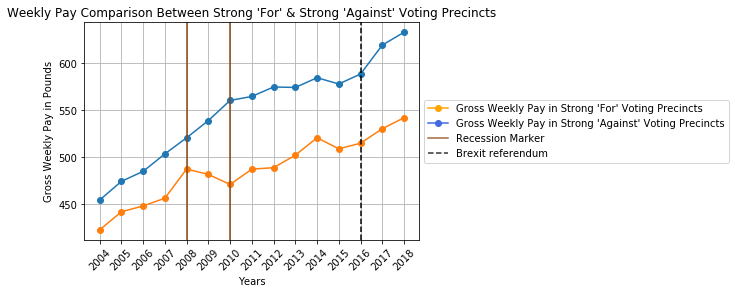

In [361]:
# plot the dataframe to visualize trends
weeklypaycomparison_df.plot(marker="o")
plt.title("Weekly Pay Comparison Between Strong 'For' & Strong 'Against' Voting Precincts")
plt.xlabel('Years')
plt.ylabel("Gross Weekly Pay in Pounds")
plt.tick_params(which='both', labelbottom=True, labelleft=True)
plt.xticks(np.arange(0, 15, step=1), np.arange(2004, 2019, step=1))
plt.xticks(rotation=45)
plt.axvline(x=12, linestyle='dashed', alpha=1, color="black")
plt.axvline(x=4, alpha=1, color="saddlebrown")
plt.axvline(x=6, alpha=1, color="saddlebrown")
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
dashed_line1 = mlines.Line2D([],[],color='saddlebrown',alpha=.8, label='Recession Marker')
dashed_line2 = mlines.Line2D([],[],color='orange',marker= 'o', label="Gross Weekly Pay in Strong 'For' Voting Precincts")
dashed_line3 = mlines.Line2D([],[],color='royalblue', marker= 'o', label="Gross Weekly Pay in Strong 'Against' Voting Precincts")
dashed_line4 = mlines.Line2D([],[],color='Black',linestyle='dashed',alpha=.8,label='Brexit referendum')
plt.legend(loc ='center left',bbox_to_anchor=(1, 0.5), handles=[dashed_line2, dashed_line3,dashed_line1,dashed_line4])

 unemployment_df

In [362]:
# separate precincts that voted strongly "For" Brexit
strongleaveunemployment_df=unemployment_df.loc[[0,1,3,5], :]
strongleaveunemployment_df

,Unemployment Rate by Area,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,North East Lincolnshire,6.0,6.3,6.6,7.5,10.5,10.9,12.3,11.5,10.8,8.8,7.7,6.3,5.6,5.7
1,Boston,4.4,5.2,5.0,5.0,7.0,7.3,8.4,6.4,5.8,5.4,4.5,4.3,4.7,3.8
3,Castle Point,3.4,4.0,3.6,4.3,6.9,6.8,7.0,7.3,6.1,5.5,3.8,3.9,3.5,3.1
5,Havering,4.8,4.8,3.9,5.0,7.9,8.5,8.2,9.4,8.9,6.3,6.0,4.4,4.8,4.7


In [363]:
# separate precincts that voted strongly "For" Brexit
strongleaveavgunemployment_df=strongleaveunemployment_df.mean()
strongleaveavgunemployment_df=strongleaveavgunemployment_df.to_frame().reset_index()
strongleaveavgunemployment_df

,index,0
0,2005,4.65
1,2006,5.08
2,2007,4.77
3,2008,5.45
4,2009,8.07
5,2010,8.38
6,2011,8.98
7,2012,8.65
8,2013,7.90
9,2014,6.50


In [364]:
#separate precincts that voted to "Against" Brexit
strongstayunemployment_df=unemployment_df.loc[[2,4,6,7], :]
strongstayunemployment_df

,Unemployment Rate by Area,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,Cambridge,4.8,5.4,5.3,5.0,4.8,5.2,5.4,4.7,5.2,4.1,3.3,3.5,3.5,3.8
4,Lambeth,8.6,9.1,9.9,8.8,10.4,9.3,10.4,10.0,8.7,6.6,6.1,6.1,4.8,6.3
6,Oxford,4.8,5.9,6.5,5.3,5.7,6.6,5.7,5.9,5.8,4.6,3.7,4.2,2.9,3.5
7,City of Edinburgh,5.1,5.2,4.3,4.5,6.3,6.5,7.0,6.6,7.1,5.6,5.5,4.2,3.2,4.0


In [365]:
#calculate averages for "Against" precincts
strongstayavgunemployment_df=strongstayunemployment_df.mean()
strongstayavgunemployment_df=strongstayavgunemployment_df.to_frame().reset_index()
strongstayavgunemployment_df

,index,0
0,2005,5.82
1,2006,6.40
2,2007,6.50
3,2008,5.90
4,2009,6.80
5,2010,6.90
6,2011,7.12
7,2012,6.80
8,2013,6.70
9,2014,5.22


In [366]:
#merge to compare
unemploymentcomparison_df=pd.merge(strongstayavgunemployment_df, strongleaveavgunemployment_df,on='index', how='outer')
unemploymentcomparison_df

,index,0_x,0_y
0,2005,5.82,4.65
1,2006,6.40,5.08
2,2007,6.50,4.77
3,2008,5.90,5.45
4,2009,6.80,8.07
5,2010,6.90,8.38
6,2011,7.12,8.98
7,2012,6.80,8.65
8,2013,6.70,7.90
9,2014,5.22,6.50


In [367]:
#rename columns
unemploymentcomparison_df= unemploymentcomparison_df.rename(columns={'index': 'Date', '0_x': 'Unemployment Rate in Strong Remain Voting Precincts', '0_y': 'Unemployment Rate in Strong Leave Voting Precincts'})
pd.set_option('display.precision', 2)
unemploymentcomparison_df

,Date,Unemployment Rate in Strong Remain Voting Precincts,Unemployment Rate in Strong Leave Voting Precincts
0,2005,5.82,4.65
1,2006,6.40,5.08
2,2007,6.50,4.77
3,2008,5.90,5.45
4,2009,6.80,8.07
5,2010,6.90,8.38
6,2011,7.12,8.98
7,2012,6.80,8.65
8,2013,6.70,7.90
9,2014,5.22,6.50


In [368]:
#make date the index
unemploymentcomparison_df=unemploymentcomparison_df.set_index('Date')
unemploymentcomparison_df

,Unemployment Rate in Strong Remain Voting Precincts,Unemployment Rate in Strong Leave Voting Precincts
Date,,
2005,5.82,4.65
2006,6.40,5.08
2007,6.50,4.77
2008,5.90,5.45
2009,6.80,8.07
2010,6.90,8.38
2011,7.12,8.98
2012,6.80,8.65
2013,6.70,7.90


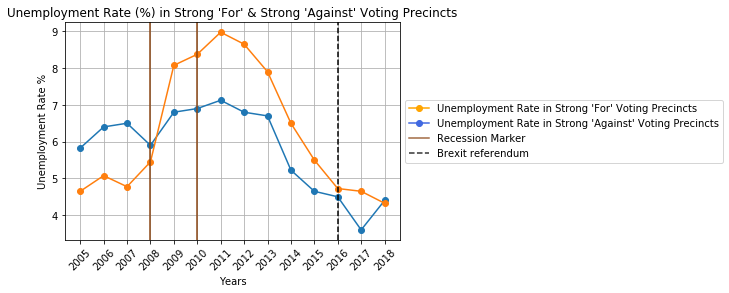

In [369]:
#plot to visualize trends
unemploymentcomparison_df.plot(marker="o")
plt.title("Unemployment Rate (%) in Strong 'For' & Strong 'Against' Voting Precincts")
plt.xlabel('Years')
plt.ylabel("Unemployment Rate %")
plt.tick_params(which='both', labelbottom=True, labelleft=True)
plt.xticks(np.arange(0, 14, step=1), np.arange(2005, 2019, step=1))
plt.xticks(rotation=45)
plt.axvline(x=11, linestyle='dashed', alpha=1, color="black")
plt.axvline(x=3, alpha=1, color="saddlebrown")
plt.axvline(x=5, alpha=1, color="saddlebrown")
plt.grid(True)
dashed_patch1 = mlines.Line2D([],[],color='saddlebrown',alpha=.8, label='Recession Marker')
dashed_patch2 = mlines.Line2D([],[],color='orange',marker= 'o', label="Unemployment Rate in Strong 'For' Voting Precincts")
dashed_patch3 = mlines.Line2D([],[],color='royalblue',marker= 'o', label="Unemployment Rate in Strong 'Against' Voting Precincts")
dashed_patch4 = mlines.Line2D([],[],color='Black',linestyle='dashed',alpha=.8,label='Brexit referendum')
plt.legend(loc ='center left',bbox_to_anchor=(1, 0.5), handles=[dashed_patch2, dashed_patch3, dashed_patch1,dashed_patch4])


In [370]:
#separate precincts that voted strongly "For" Brexit
jobdensityleave_df=jobsdensity_df.loc[[0,1,3,5], :]
jobdensityleave_df

,Job Density by Area,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,North East Lincolnshire,0.79,0.76,0.74,0.75,0.76,0.74,0.74,0.73,0.70,0.71,0.74,0.78,0.79,0.79
1,Boston,0.77,0.84,0.80,0.85,0.77,0.75,0.82,0.84,0.86,0.88,0.83,0.80,0.87,0.94
3,Castle Point,0.43,0.45,0.45,0.51,0.45,0.47,0.48,0.48,0.54,0.46,0.48,0.52,0.52,0.50
5,Havering,0.65,0.63,0.60,0.56,0.59,0.54,0.55,0.55,0.56,0.60,0.59,0.60,0.61,0.64


In [371]:
#calculate precincts that voted strongly "Against" Brexit
avgjobdensityleave_df=jobdensityleave_df.mean()
avgjobdensityleave_df=avgjobdensityleave_df.to_frame().reset_index()
avgjobdensityleave_df

,index,0
0,2004,0.66
1,2005,0.67
2,2006,0.65
3,2007,0.67
4,2008,0.64
5,2009,0.62
6,2010,0.65
7,2011,0.65
8,2012,0.67
9,2013,0.66


In [372]:
#separate precincts that voted strongly "Against" Brexit
jobdensitystay_df=jobsdensity_df.loc[[2,4,6,7], :]
jobdensitystay_df

,Job Density by Area,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,Cambridge,1.07,1.04,1.12,1.14,1.17,1.15,1.07,1.08,1.12,1.22,1.27,1.28,1.29,1.34
4,Lambeth,0.72,0.69,0.67,0.66,0.66,0.69,0.68,0.66,0.66,0.72,0.76,0.77,0.72,0.78
6,Oxford,1.05,1.01,1.10,1.09,1.15,1.12,1.06,1.09,1.09,1.11,1.21,1.22,1.23,1.24
7,City of Edinburgh,1.13,1.12,1.08,1.06,1.05,1.05,1.01,1.04,1.07,1.02,1.01,1.02,1.01,1.02


In [373]:
#calculate averages
avgjobdensitystay_df=jobdensitystay_df.mean()
avgjobdensitystay_df=avgjobdensitystay_df.to_frame().reset_index()
avgjobdensitystay_df

,index,0
0,2004,0.99
1,2005,0.97
2,2006,0.99
3,2007,0.99
4,2008,1.01
5,2009,1.00
6,2010,0.96
7,2011,0.97
8,2012,0.99
9,2013,1.02


In [374]:
#merge to compare
jobdensitycomparison_df=pd.merge(avgjobdensitystay_df, avgjobdensityleave_df, on='index', how='outer')
jobdensitycomparison_df

,index,0_x,0_y
0,2004,0.99,0.66
1,2005,0.97,0.67
2,2006,0.99,0.65
3,2007,0.99,0.67
4,2008,1.01,0.64
5,2009,1.00,0.62
6,2010,0.96,0.65
7,2011,0.97,0.65
8,2012,0.99,0.67
9,2013,1.02,0.66


In [375]:
#rename columns
jobdensitycomparison_df= jobdensitycomparison_df.rename(columns={'index': 'Date', '0_x': 'Job Density in Strong Remain Cities', '0_y': 'Job Density in Strong Leave Cities'})
pd.set_option('display.precision', 2)
jobdensitycomparison_df

,Date,Job Density in Strong Remain Cities,Job Density in Strong Leave Cities
0,2004,0.99,0.66
1,2005,0.97,0.67
2,2006,0.99,0.65
3,2007,0.99,0.67
4,2008,1.01,0.64
5,2009,1.00,0.62
6,2010,0.96,0.65
7,2011,0.97,0.65
8,2012,0.99,0.67
9,2013,1.02,0.66


In [376]:
#make date index
jobdensitycomparison_df=jobdensitycomparison_df.set_index('Date')
jobdensitycomparison_df

,Job Density in Strong Remain Cities,Job Density in Strong Leave Cities
Date,,
2004,0.99,0.66
2005,0.97,0.67
2006,0.99,0.65
2007,0.99,0.67
2008,1.01,0.64
2009,1.00,0.62
2010,0.96,0.65
2011,0.97,0.65
2012,0.99,0.67


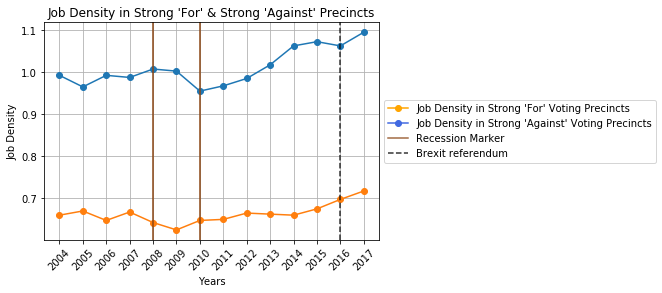

In [378]:
#plot to visualize trends
jobdensitycomparison_df.plot(marker="o")
plt.title("Job Density in Strong 'For' & Strong 'Against' Precincts")
plt.xlabel('Years')
plt.ylabel("Job Density")
plt.xticks(np.arange(0, 14, step=1), np.arange(2004, 2018, step=1))
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axvline(x=12, linestyle='dashed', alpha=.8, color="black")
plt.axvline(x=4, alpha=1, color="saddlebrown")
plt.axvline(x=6, alpha=1, color="saddlebrown")
plt.grid(True)
dashed_line1 = mlines.Line2D([],[],color='saddlebrown',alpha=.8, label='Recession Marker')
dashed_line2 = mlines.Line2D([],[],color='orange',marker= 'o', label="Job Density in Strong 'For' Voting Precincts")
dashed_line3 = mlines.Line2D([],[],color='royalblue',marker= 'o', label="Job Density in Strong 'Against' Voting Precincts")
dashed_line4 = mlines.Line2D([],[],color='Black',linestyle='dashed',alpha=.8,label='Brexit referendum')
plt.legend(loc ='center left',bbox_to_anchor=(1, 0.5), handles=[dashed_line2, dashed_line3,dashed_line1,dashed_line4])
